In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc,precision_recall_curve,f1_score
import matplotlib.pyplot as plt

Text(-0.15, 1, '(b)')

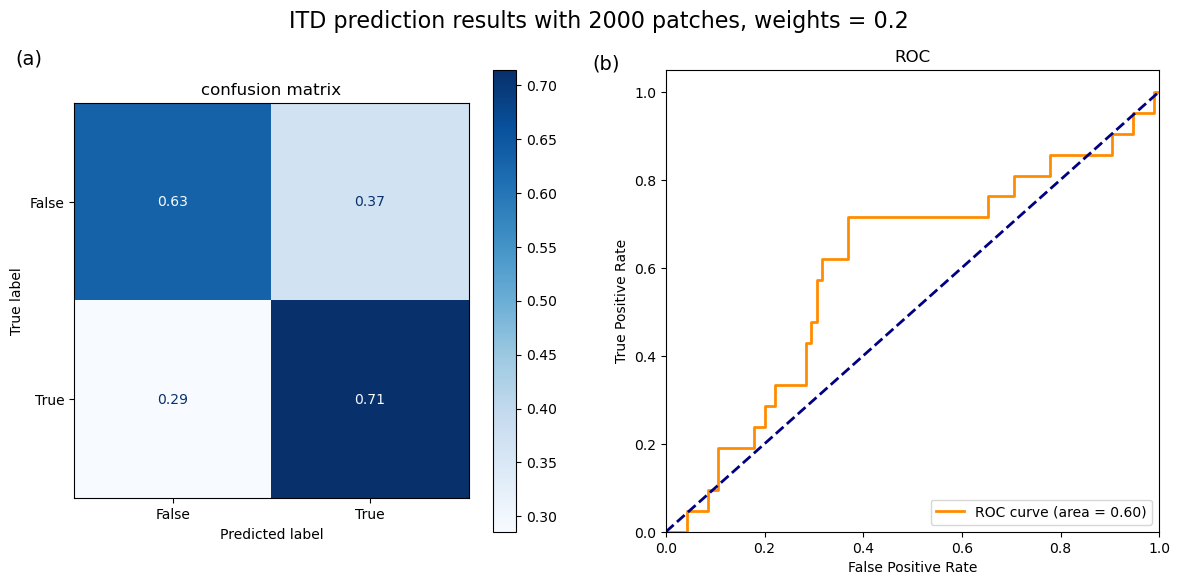

In [2]:
# Load the CSV file into a pandas DataFrame
csv_path = "/home/weber50432/AML_image_processing/MIL_slide_level/output/ITD_patch_2000/predictions.csv"
df = pd.read_csv(csv_path, sep=",", encoding="utf-8")
# Get the true labels and predicted labels
y_true = df['target']
y_pred = df['prediction']
# Get the gene mutation probabilities
y_score = df['probability']
cm = confusion_matrix(y_true, y_pred, normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
# Compute the false positive rate, true positive rate and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# set the title of the figure
fig.suptitle('ITD prediction results with 2000 patches, weights = 0.2', fontsize=16)
# Plot the confusion matrix in the first subplot
cm_display.plot(ax=axs[0], cmap=plt.cm.Blues)
axs[0].set_title('confusion matrix')
axs[0].text(-0.15, 1.1, '(a)', transform=axs[0].transAxes, size=14)
# Plot the ROC curve in the second subplot
axs[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC')
axs[1].legend(loc="lower right")
axs[1].text(-0.15, 1, '(b)', transform=axs[1].transAxes, size=14)


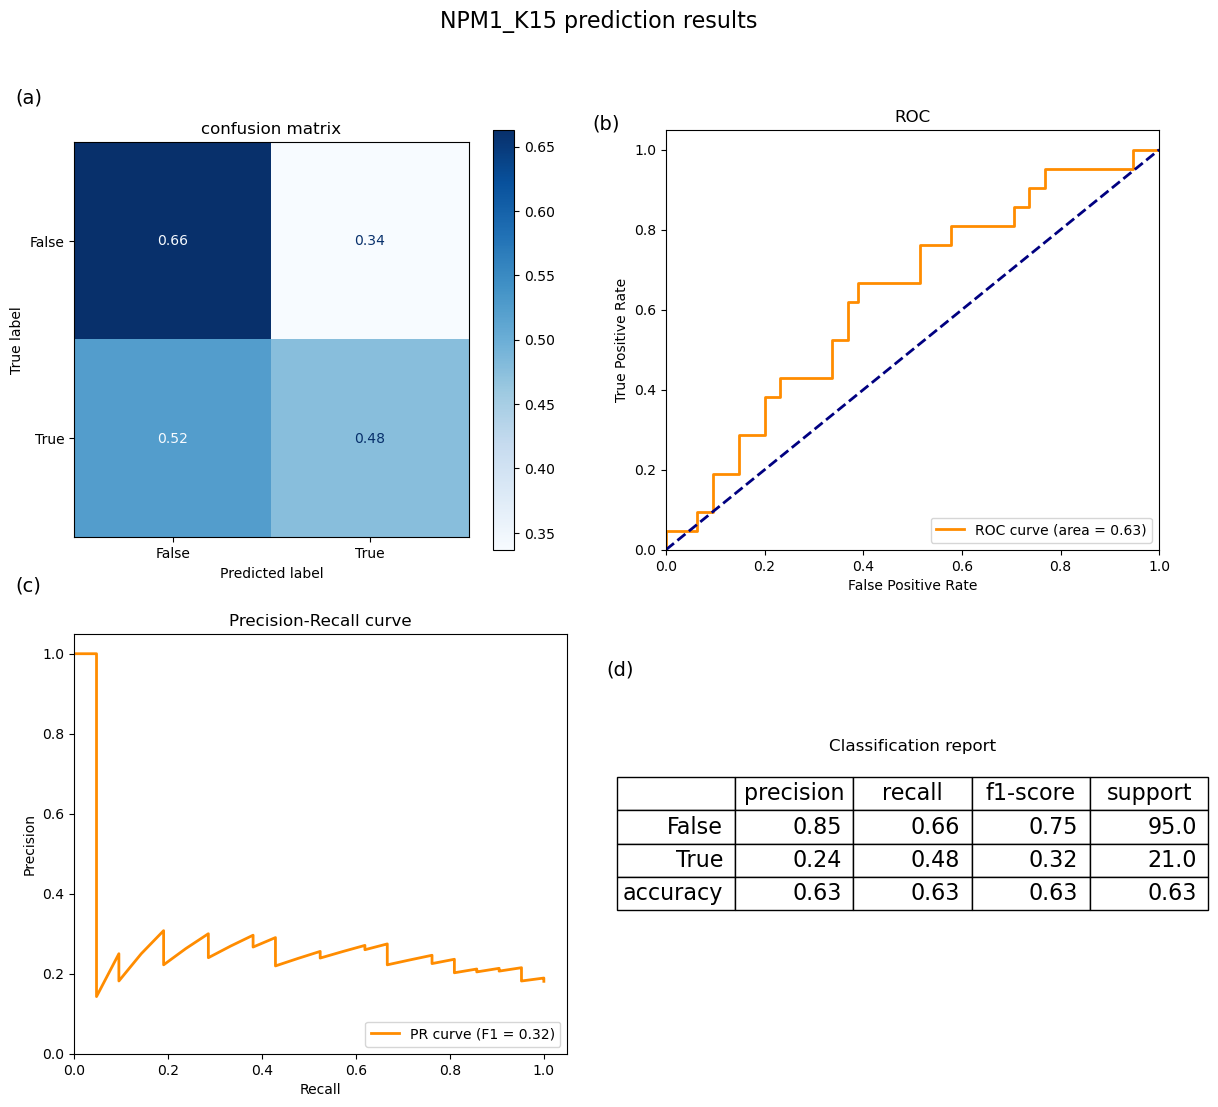

In [11]:
job = "NPM1_K15"
# Load the CSV file into a pandas DataFrame
csv_path = f"/home/weber50432/AML_image_processing/MIL_slide_level/output/{job}/predictions.csv"
df = pd.read_csv(csv_path, sep=",", encoding="utf-8")
# Get the true labels and predicted labels
y_true = df['target']
y_pred = df['prediction']
# Get the gene mutation probabilities
y_score = df['probability']
cm = metrics.confusion_matrix(y_true, y_pred, normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
# Compute the false positive rate, true positive rate and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)
# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)
# show the accuracy, precision, recall and f1-score
# print(metrics.classification_report(y_true, y_pred))
# Create a figure with two subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
# set the title of the figure
fig.suptitle(f'{job} prediction results', fontsize=16)
# Plot the confusion matrix in the first subplot
cm_display.plot(ax=axs[0][0], cmap=plt.cm.Blues)
axs[0][0].set_title('confusion matrix')
axs[0][0].text(-0.15, 1.1, '(a)', transform=axs[0][0].transAxes, size=14)
# Plot the ROC curve in the second subplot
axs[0][1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0][1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0][1].set_xlim([0.0, 1.0])
axs[0][1].set_ylim([0.0, 1.05])
axs[0][1].set_xlabel('False Positive Rate')
axs[0][1].set_ylabel('True Positive Rate')
axs[0][1].set_title('ROC')
axs[0][1].legend(loc="lower right")
axs[0][1].text(-0.15, 1, '(b)', transform=axs[0][1].transAxes, size=14)

# Plot the precision-recall curve in the third subplot
precision, recall, thresholds = precision_recall_curve(y_true, y_score)
f1 = f1_score(y_true, y_pred)
axs[1][0].plot(recall, precision, color='darkorange', lw=2, label='PR curve (F1 = %0.2f)' % f1)
axs[1][0].set_xlim([0.0, 1.05])
axs[1][0].set_ylim([0.0, 1.05])
axs[1][0].set_xlabel('Recall')
axs[1][0].set_ylabel('Precision')
axs[1][0].text(-0.12, 1.1, '(c)', transform=axs[1][0].transAxes, size=14)
axs[1][0].legend(loc="lower right")
axs[1][0].set_title('Precision-Recall curve')
# show the accuracy, precision, recall and f1-score in a table form at the fourth subplot
report = metrics.classification_report(y_true, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.reset_index(drop=False, inplace=True)
df_report.rename(columns={'index':''}, inplace=True)
df_report.replace(to_replace="0", value='False', inplace=True)
df_report.replace(to_replace="1", value='True', inplace=True)
# remove the last two rows(avg)
df_report.drop(df_report.tail(2).index, inplace=True)
df_report = df_report.round(2)
axs[1][1].text(-0.12,0.9, '(d)', transform=axs[1][1].transAxes, size=14)
axs[1][1].axis('tight')
axs[1][1].axis('off')
axs[1][1].set_title('Classification report', y=0.8,pad=-24)
# add the table
the_table = axs[1][1].table(cellText=df_report.values, colLabels=df_report.columns ,loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(16)
the_table.scale(1.2, 2)

# Show the plot
plt.show()

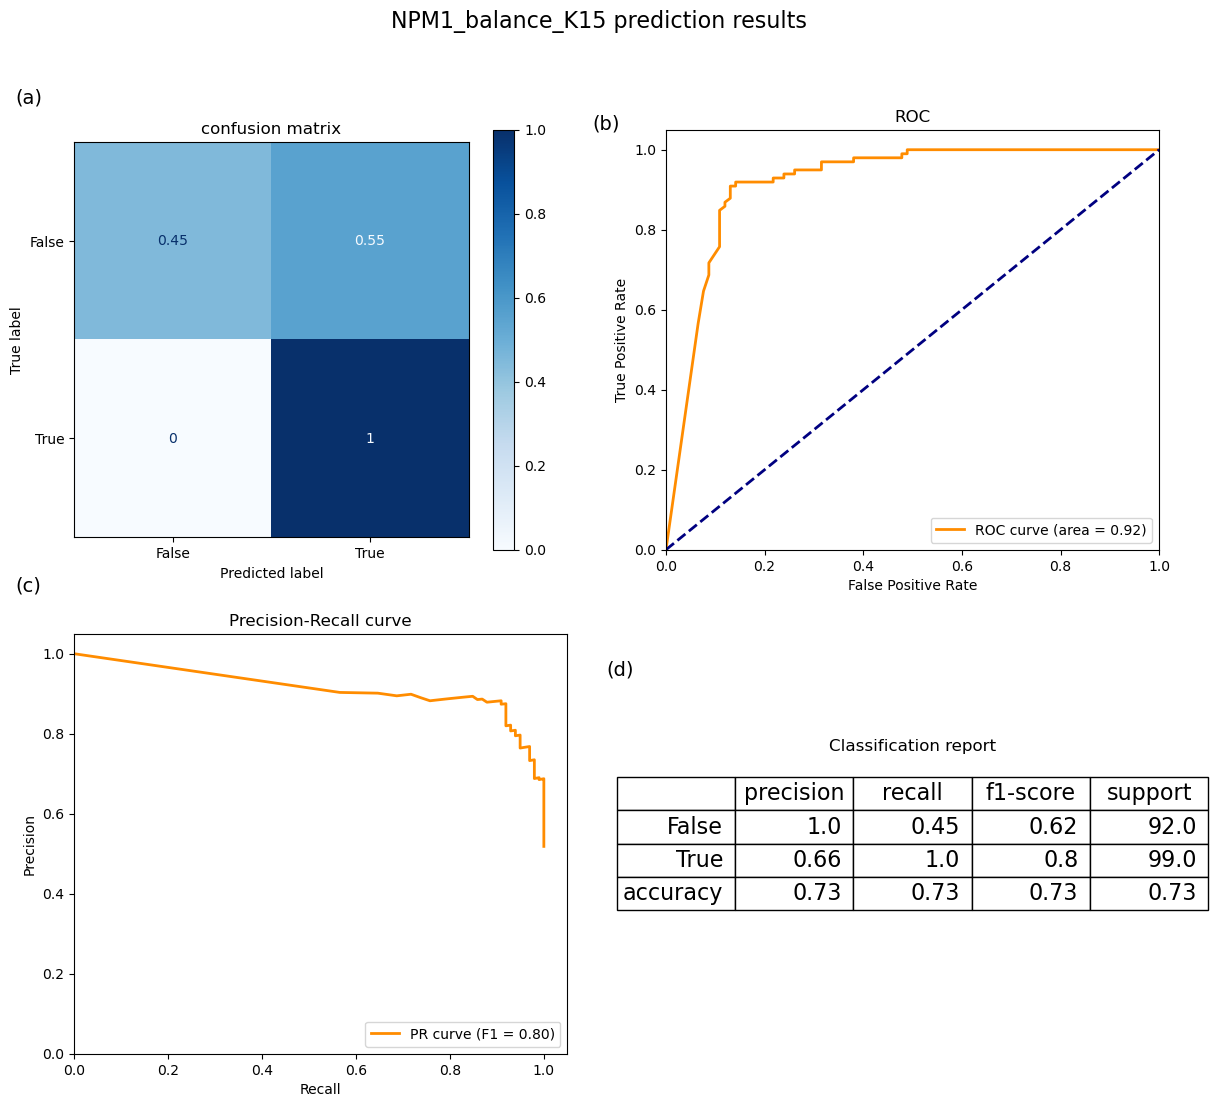

In [13]:
job = "NPM1_balance_K15"
# Load the CSV file into a pandas DataFrame
csv_path = f"/home/weber50432/AML_image_processing/MIL_slide_level/output/{job}/predictions.csv"
df = pd.read_csv(csv_path, sep=",", encoding="utf-8")
# Get the true labels and predicted labels
y_true = df['target']
y_pred = df['prediction']
# Get the gene mutation probabilities
y_score = df['probability']
cm = metrics.confusion_matrix(y_true, y_pred, normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
# Compute the false positive rate, true positive rate and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)
# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)
# show the accuracy, precision, recall and f1-score
# print(metrics.classification_report(y_true, y_pred))
# Create a figure with two subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
# set the title of the figure
fig.suptitle(f'{job} prediction results', fontsize=16)
# Plot the confusion matrix in the first subplot
cm_display.plot(ax=axs[0][0], cmap=plt.cm.Blues)
axs[0][0].set_title('confusion matrix')
axs[0][0].text(-0.15, 1.1, '(a)', transform=axs[0][0].transAxes, size=14)
# Plot the ROC curve in the second subplot
axs[0][1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0][1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0][1].set_xlim([0.0, 1.0])
axs[0][1].set_ylim([0.0, 1.05])
axs[0][1].set_xlabel('False Positive Rate')
axs[0][1].set_ylabel('True Positive Rate')
axs[0][1].set_title('ROC')
axs[0][1].legend(loc="lower right")
axs[0][1].text(-0.15, 1, '(b)', transform=axs[0][1].transAxes, size=14)

# Plot the precision-recall curve in the third subplot
precision, recall, thresholds = precision_recall_curve(y_true, y_score)
f1 = f1_score(y_true, y_pred)
axs[1][0].plot(recall, precision, color='darkorange', lw=2, label='PR curve (F1 = %0.2f)' % f1)
axs[1][0].set_xlim([0.0, 1.05])
axs[1][0].set_ylim([0.0, 1.05])
axs[1][0].set_xlabel('Recall')
axs[1][0].set_ylabel('Precision')
axs[1][0].text(-0.12, 1.1, '(c)', transform=axs[1][0].transAxes, size=14)
axs[1][0].legend(loc="lower right")
axs[1][0].set_title('Precision-Recall curve')
# show the accuracy, precision, recall and f1-score in a table form at the fourth subplot
report = metrics.classification_report(y_true, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.reset_index(drop=False, inplace=True)
df_report.rename(columns={'index':''}, inplace=True)
df_report.replace(to_replace="0", value='False', inplace=True)
df_report.replace(to_replace="1", value='True', inplace=True)
# remove the last two rows(avg)
df_report.drop(df_report.tail(2).index, inplace=True)
df_report = df_report.round(2)
axs[1][1].text(-0.12,0.9, '(d)', transform=axs[1][1].transAxes, size=14)
axs[1][1].axis('tight')
axs[1][1].axis('off')
axs[1][1].set_title('Classification report', y=0.8,pad=-24)
# add the table
the_table = axs[1][1].table(cellText=df_report.values, colLabels=df_report.columns ,loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(16)
the_table.scale(1.2, 2)

# Show the plot
plt.show()